In [1]:
import batman
import emcee
import glob
import os
import shutil
import math
import corner
import numba
import itertools
import sys

import numpy       as np
import pandas      as pd
import time        as tm 
import lightkurve  as lk
# import mr_forecast as mr

import matplotlib                      as mpl
import matplotlib.pyplot               as plt
import matplotlib.gridspec             as gridspec
from   matplotlib.backends.backend_pdf import PdfPages
import mpl_axes_aligner


import astropy.io.fits    as apf
import astropy.units      as units
from   astropy.stats      import sigma_clip
from   astropy.wcs        import WCS
from   astropy.timeseries import BoxLeastSquares
from   astroquery.mast    import Catalogs
from   astroquery         import svo_fps

from multiprocessing import Pool, Process
from wotan           import flatten
from functools       import partial
from ldtk            import LDPSetCreator, BoxcarFilter, TabulatedFilter, SVOFilter
from ldtk.filters    import tess, sdss_z
from IPython.display import display, HTML
from tqdm.auto       import tqdm


# import eleanor

# import warnings
# warnings.filterwarnings("ignore")
# display(HTML("<style>.container { width:95% !important; }</style>"))
module_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.insert(0, module_path)
from Functions_all import *
# from Executing_code_part_2_init_single_search import *
# from Executing_code_part_0_just_getting_data import *
# from Executing_code_part_2_init_single_search import *
from Executing_code_part_5_final_singles_search_and_figures import *
import gc



In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;



<IPython.core.display.Javascript object>

In [3]:
non_convergence = [419411415, 235683377, 243641947, 55650590, 95057860, 239332587, 46432937, 201177276, 296739893, 246965431,
                  250111245, 178709444, 260004324, 271169413, 429358906, 172370679, 118327550, 54962195, 153065527, 98796344, 243185500,260708537]

In [4]:
target_files = [glob.glob('../toi_data/target*'+str(x)+'*check')[0] for x in non_convergence]
target_files


['../toi_data/target_tic-419411415_gaiaID-1842656663520849024_data_check',
 '../toi_data/target_tic-235683377_gaiaID-2265154211335825152_data_check',
 '../toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check',
 '../toi_data/target_tic-55650590_gaiaID-4665277593852295424_data_check',
 '../toi_data/target_tic-95057860_gaiaID-2997312063605005056_data_check',
 '../toi_data/target_tic-239332587_gaiaID-2070115588901082368_data_check',
 '../toi_data/target_tic-46432937_gaiaID-2984391358868786816_data_check',
 '../toi_data/target_tic-201177276_gaiaID-6521531466699512064_data_check',
 '../toi_data/target_tic-296739893_gaiaID-5738284016370287616_data_check',
 '../toi_data/target_tic-246965431_gaiaID-102461087706561024_data_check',
 '../toi_data/target_tic-250111245_gaiaID-2640121486388076032_data_check',
 '../toi_data/target_tic-178709444_gaiaID-5362352744504000256_data_check',
 '../toi_data/target_tic-260004324_gaiaID-5500061456275483776_data_check',
 '../toi_data/target_tic-2711

../toi_data/target_tic-419411415_gaiaID-1842656663520849024_data_check
419411415
running ticid 419411415
getting star params
catalog df          TICID          RA        DEC    Vmag    Jmag     Tmag    Teff  \
0  419411415.0  313.770485  24.360752  15.899  11.926  13.6136  3262.0   

   eTeff_x       Rad      eRad  ...  S54   S55  eTeff_y     logg     elogg  \
0    157.0  0.397586  0.012019  ...  0.0  10.0    157.0  4.82888  0.003462   

   M/H  eM/H          GAIA    aLSM    bLSM  
0  NaN   NaN  1.842657e+18  0.1529  0.4604  

[1 rows x 80 columns]


  0%|          | 0/1 targets | 00:00<?

PERIODIC SEARCH
running search on all data
recursive BLS
depth found 0.06792650404217958
Candidate: P=1.6308 d, SDE=73.72, SDE2=8.21, min_SDE=10.00
number transit times in baseline: 25  
number of point in each transit:  [2 2 2 2 2 2 2 2 2 2 6 6 5 6 6 6 6 5 6 6 6 6 5 5 6] 
transit likelihood: [ 0.00382137  0.00442996  0.00338604  0.00228154  0.00483005  0.00516594
  0.00367421  0.00428079  0.00497586 -0.00195862  0.01418495  0.01186228
  0.01297045  0.01427108  0.01344301  0.01249603  0.014109    0.01058067
  0.01485765  0.01554859  0.01626232  0.01302135  0.0159291   0.01446122
  0.01565771]


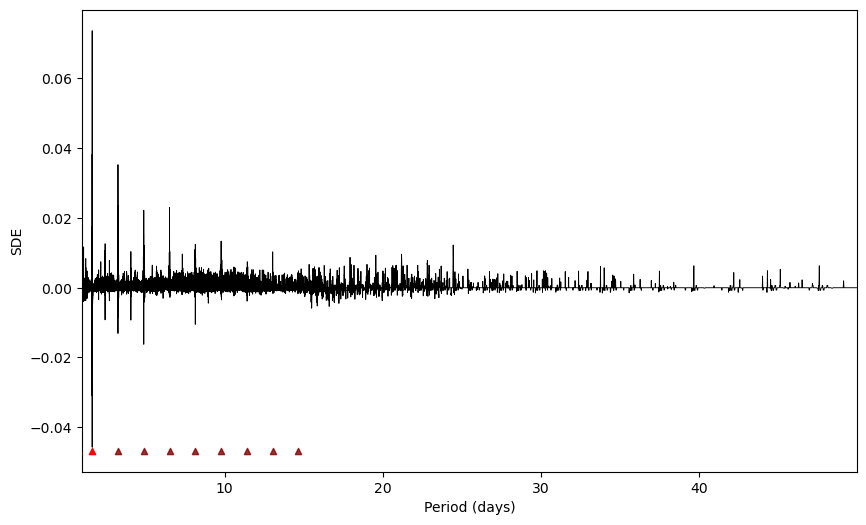

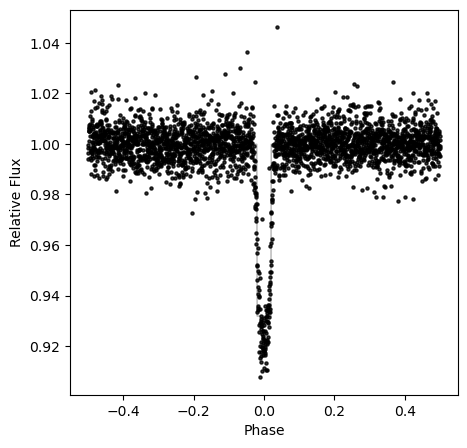

ΔBIC=3063.90, (threshold=75)
depths all [0.06792650404217958]
Accepted planet: P=1.6308 d
depth found 0.013033475189610278
Candidate: P=13.8712 d, SDE=14.52, SDE2=1.38, min_SDE=10.00
number transit times in baseline: 3  
number of point in each transit:  [ 8 14 48] 
transit likelihood: [0.00108799 0.00096084 0.00389668]


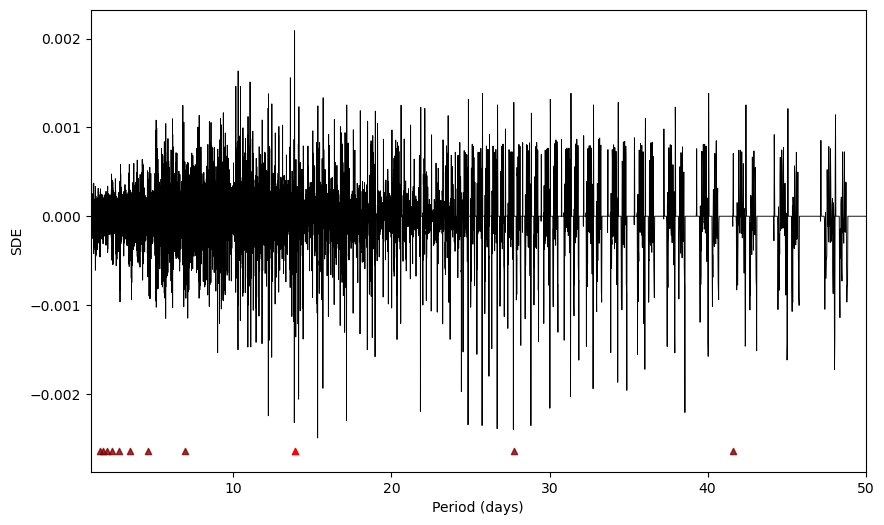

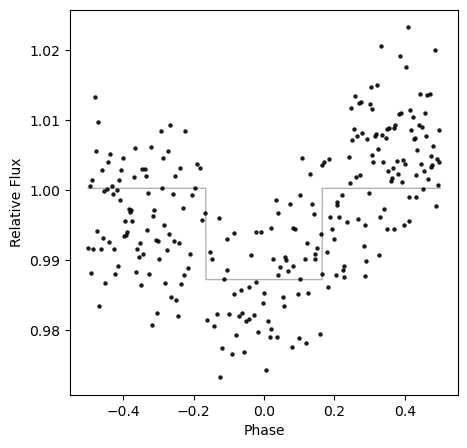

factors [0.11756]
final of periodicity check; period:  13.87120208251966  keep factor 1
ΔBIC=56.82, (threshold=75)
depths all [0.06792650404217958, 0.013033475189610278]
Accepted planet: P=13.8712 d
depth found 0.008818642738004609
Candidate: P=14.3103 d, SDE=10.52, SDE2=0.13, min_SDE=10.00
Stopping: SDE below threshold.
len(t0s) 2
periodic, period = 1.6307594163403782 days
a_smaj_guess 2.916127339574127


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Output()

N_intran 1568 depth 0.06770184053857708 sig 0.0018087943865123283
[SMC attempt 1] draws=2000, chains=4


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Output()

  min relative ESS ≈ 0.001
           mean     sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Per       1.631  0.000     1.631     1.631      0.000    0.000       5.0   
rp_rs     0.221  0.018     0.190     0.237      0.009    0.005       4.0   
a_rs      9.044  0.962     7.839    10.574      0.478    0.239       4.0   
cosi      0.003  0.002     0.001     0.006      0.001    0.001       4.0   
t0     1712.886  0.003  1712.881  1712.891      0.002    0.001       4.0   

       ess_tail  r_hat  
Per         5.0   3.73  
rp_rs       9.0   3.76  
a_rs        9.0   4.60  
cosi        4.0   3.84  
t0          4.0   3.87  
[SMC attempt 2] draws=4000, chains=4


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


  min relative ESS ≈ 0.000


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Output()

           mean     sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Per       1.631  0.000     1.631     1.631      0.000    0.000       4.0   
rp_rs     0.235  0.011     0.220     0.247      0.006    0.001       4.0   
a_rs      9.118  0.337     8.723     9.584      0.167    0.059       4.0   
cosi      0.005  0.006     0.000     0.015      0.003    0.002       4.0   
t0     1712.897  0.004  1712.890  1712.903      0.002    0.001       4.0   

       ess_tail  r_hat  
Per         4.0   6.20  
rp_rs       9.0   3.25  
a_rs        4.0   3.89  
cosi        4.0   4.85  
t0          6.0   4.25  
[SMC attempt 3] draws=6000, chains=4


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


  min relative ESS ≈ 0.000


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Output()

           mean     sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Per       1.631  0.000     1.631     1.631      0.000    0.000       4.0   
rp_rs     0.238  0.005     0.232     0.245      0.002    0.001       4.0   
a_rs      9.482  0.859     8.034    10.532      0.429    0.217       4.0   
cosi      0.021  0.028     0.000     0.074      0.014    0.008       4.0   
t0     1712.892  0.006  1712.882  1712.896      0.003    0.002       4.0   

       ess_tail  r_hat  
Per         4.0   4.99  
rp_rs       4.0   4.96  
a_rs        7.0   5.60  
cosi        4.0   5.70  
t0          5.0   4.44  
[SMC attempt 4] draws=8000, chains=4


In [ ]:

# import matplotlib_inline
# %matplotlib ipympl
%matplotlib inline

try:
    file_factor = int(0)
except ValueError:
    
    sys.exit(1)
# file_num +=1000

time1 = tm.time()
target_files = [glob.glob('../toi_data/target*'+str(x)+'*check')[0] for x in non_convergence]
# target_files = glob.glob('../toi_data/target*check')

# np.random.seed(42)
# main(target_files[-1])

# with Pool(30) as pool:
#     pool.map(main, target_files)

# running_list = list(range(len(target_files)))
# np.random.shuffle(running_list)
# my_file = [x for x in target_files if "163539739" in x]
# # for jjj in bad_target_lst[3:]:
# for jjj in np.array(target_files)[np.array(running_list)]:
# for jjj in np.array(target_files)[:1]:
for jjj in target_files:
    print(jjj)
# #     if "417931300" and "142937186" not in jjj:
# #     try:
#     try:
    main(jjj)
#     except: 
#         continue
# #     except Exception as error:
# #         print(error)
# #     gc.collect()
# #     break

time_end = tm.time()

print('DONE!!! time it took: ', (time_end-time1)/60, ' minutes')


In [ ]:
import pandas as pd

df = pd.DataFrame({'aLSM':[10], 'bLSM':[2]})

z = df[['aLSM', 'bLSM']].values[0].astype(float)
type(z)
a, b = z
a, b



In [ ]:
pd.read_csv('./PS_2025.08.05_10.28.29.csv', skiprows = 104 )

In [ ]:
for file in glob.glob('./toi_data/target*'):
    new_file = file
#     print(file)
    if '_check' in new_file:
#         print(new_file[:-6])
        new_file = new_file[:-6]
#     if '_data' in new_file:
#         new_file = new_file[:-5]
#     print(new_file ==file)
    print(new_file)
    os.rename(file, new_file)

In [ ]:
# for idx, file in enumerate(glob.glob('./toi_data/target*')):
#     if '200322593' in file:
#         print(idx)
#         break

In [ ]:
return pd.DataFrame(np.nan, index=summary.index, columns=summary.columns)
# import os

# def combine_text_files_skipping_first_line(input_directory, output_filename):
#     """
#     Combines all .txt files in a given directory into a single output file,
#     skipping the first line of each input file.

#     Args:
#         input_directory (str): The path to the directory containing the text files.
#         output_filename (str): The name of the file to which the combined content will be written.
#     """
#     iii = 0
#     with open(output_filename, 'w') as outfile:
#         for filename in os.listdir(input_directory):
#             if filename.endswith(".sh"):  # Process only .txt files
#                 filepath = os.path.join(input_directory, filename)
#                 try:
#                     with open(filepath, 'r') as infile:
#                         if iii>0:
#                             # Skip the first line using next()
#                             next(infile)
#                         # Write the remaining lines to the output file
#                         for line in infile:
#                             outfile.write(line)
#                 except Exception as e:
#                     print(f"Error processing {filename}: {e}")
#             iii+=1
# # Example usage:
# input_dir = 'sector_executable_files'  # Replace with the path to your directory
# output_file = 'run_tois_all.sh' # Name of the output file

# combine_text_files_skipping_first_line(input_dir, output_file)
# print(f"All text files from '{input_dir}' combined into '{output_file}', skipping the first line of each.")

In [ ]:
all_tois = pd.read_csv('./PS_2025.08.05_09.17.28.csv', skiprows = 105)

gaia_ids = [all_tois['gaia_id'][x][9:] for x in range(len(all_tois))]

def mk_target_dir_mv_fits_file(fits_file_with_GAIAid, sector_df):
    gaia_ID = fits_file_with_GAIAid.split('-')[2]
    file_gaia = 'Gaia DR2 '+gaia_ID
    

#     print(gaia_ID, sector_df[sector_df['gaia_id'].astype(str)==gaia_ID]['tic_id'])
    tic_id_index = sector_df[sector_df['gaia_id'].astype(str)==file_gaia]['tic_id'].index
    if len(tic_id_index)>1:
        print(tic_id_index)
    ticid = int(sector_df['tic_id'][tic_id_index[0]][4:])
    mkdir_if_doesnt_exist('./known_toi_data/', 'target_tic-'+str(ticid)+'_gaiaID-'+str(gaia_ID))
    os.rename(fits_file_with_GAIAid, './known_toi_data/target_tic-'+str(ticid)+'_gaiaID-'+str(gaia_ID)+'/'+fits_file_with_GAIAid.split('/')[-1])
    


In [ ]:
iii=0
for file in glob.glob('./known_toi_data/s00*/*/*/*/*/*/*.fits'):
    gaia_id_check = set([g_id for g_id in gaia_ids if str(g_id) in file])
    if len(gaia_id_check)==1:
        mk_target_dir_mv_fits_file(file, all_tois)
        iii+=1
        if iii%10 == 0:
            print(iii)
    elif len(gaia_id_check)>1:
        print('weird', gaia_id_check)

In [ ]:
len(og_target_files)

In [ ]:
og_target_files = [file.split('/')[2][:40] for file in glob.glob('./toi_data/target*')]
og_target_files

In [ ]:
import shutil
og_target_files = [file.split('/')[2][:40] for file in glob.glob('./toi_data/target*')]
for file in glob.glob('./known_toi_data/target*'):
    file_name = file.split('/')[2]
    target_file = file_name[:40]
    if not target_file in og_target_files:
        print(file_name)
        import shutil

        destination_directory = './toi_data/'

        try:
            shutil.copytree(file, destination_directory+'/'+file_name)
            print(f"'{file}' copied to '{destination_directory}' successfully.")
        except FileNotFoundError:
            print(f"Error: Source file '{file}' not found.")
        except Exception as e:
            print(f"An error occurred: {e}")





In [ ]:
bad_ids = [458419328, 34068865, 259168516, 271169413, 388076422, 467179528, 193634953, 233602827, 126606859, 
           70899085, 299798795, 348755728, 54962195, 37749396, 235678745, 408636441, 353475866, 396562848,
           422756130, 29960110, 235683377, 296739893, 321669174, 246965431, 98796344, 260708537, 271971130,
           153065527, 329148988, 289164482, 158588995, 95057860, 441738827, 369327947, 420112589, 307210830, 
           220479565, 377293776, 181804752, 419411415, 243641947, 77156829, 260004324, 166184428, 188589164, 
           201186294, 172370679, 259377017, 343628284, 277634430]

bad_target_lst = [glob.glob('./toi_data/target*'+str(x)+'*')[0] for x in bad_ids]

In [ ]:
ramp_data = [259168516,271169413,388076422,233602827, 126606859, 70899085, 348755728, 54962195,
             37749396, 235678745, 408636441, 396562848, 29960110, 235683377, 296739893, 321669174, 
             153065527, 260708537, 420112589, 220479565, 307210830, 377293776, 166184428,172370679,259377017]


In [ ]:
bad_target_lst

In [ ]:
# bad_target_lst

In [ ]:
# x = [4.6750454658446445, 2.343692671773644]
# y = x
# y.append(4.02938402934)
# print(x, y)

In [ ]:
periodics = [37749396, 54962195, 95057860, 103633434, 142748283,178709444, 201177276, 
 243641947,250111245,260004324,260708537, 261257684, 321669174,360156606,
 369327947, 413248763, 419411415, 455784423,
 458419328, ]
periodics_lst = [glob.glob('./toi_data/target*'+str(x)+'*')[0] for x in periodics]
periodics_lst

In [ ]:
# %matplotlib widget
# df = pd.read_csv('./toi_data/target_tic-34068865_gaiaID-5412250540681250560_data_check/target_tic-34068865_gaiaID-5412250540681250560_TGLC_APER_total.csv')

# fig, ax = plt.subplots(1)
# ax.scatter(df.TIME,df.FLUX, s = 1)

In [ ]:
x = 5
x*=abs(-2)
x

In [ ]:
10**-8.31156965e-05